# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import json
import quandl
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [4]:
# Load .env enviroment variables
load_dotenv("../../../../mes_clés.env")
#Import respective alpaca keys
alpaca_api_key = os.getenv("ALPACA_clé")
alpaca_secret = os.getenv("ALPACA_secrète")

In [5]:
#Establish alpaca connection by creating alpaca object
alpaca = tradeapi.REST(alpaca_api_key, alpaca_secret, api_version = "v2")

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [6]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [7]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD1"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [8]:
btc_url = btc_url + alpaca_api_key
eth_url = eth_url + alpaca_api_key

In [9]:
response_data_1 = requests.get(btc_url)
response_data_2 = requests.get(eth_url)

In [10]:
btc_data = response_data_1.json()
eth_data = response_data_2.json()

In [11]:
#Declare variables for "get_bars" argument
today = pd.Timestamp("2023-12-04", tz="America/New_York").isoformat()
timeframe = "1Day"
tickers = ["BTC", "ETH"]

In [12]:
# Fetch current BTC price
btc_data["data"]['1']['quotes']['USD']['price']
btc_share_price = btc_data["data"]['1']['quotes']['USD']['price']
# Fetch current ETH price
eth_data['data']['1027']['quotes']['USD']['price']
eth_share_price = eth_data['data']['1027']['quotes']['USD']['price']
# Compute current value of my crpto
btc_share_val = btc_share_price*my_btc
eth_share_val = eth_share_price*my_eth
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${btc_share_val:0.2f}")
print(f"The current value of your {my_eth} ETH is ${eth_share_val:0.2f}")

The current value of your 1.2 BTC is $50080.80
The current value of your 5.3 ETH is $11816.03


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [13]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [14]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_clé")
alpaca_secret = os.getenv("ALPACA_secrète")
# Create the Alpaca API object
alpaca = tradeapi.REST(alpaca_api_key, alpaca_secret, api_version = "v2")

In [119]:
# Format current date as ISO format
start_date = pd.Timestamp("2023-12-04", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2023-12-04", tz="America/New_York").isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
crypto_portfolio_2 = alpaca.get_bars(tickers,timeframe,start=start_date,end=end_date).df
# Reorganize the DataFrame
# Separate ticker data
AGG = crypto_portfolio_2[crypto_portfolio_2['symbol']=="AGG"].drop('symbol',axis=1)
SPY = crypto_portfolio_2[crypto_portfolio_2['symbol']=="SPY"].drop('symbol',axis=1)

# Concatenate the ticker DataFrames
crypto_concat = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Remove time stamps and Preview DataFrame
crypto_concat.index = crypto_concat.index.date
crypto_concat

AGG                                                    \
             close      high       low trade_count    open    volume   
2018-12-04  105.08  105.2799  104.9400       14725  104.98   5971915   
2018-12-06  105.34  105.5400  105.2800       19148  105.29   7665752   
2018-12-07  105.48  105.5500  105.2800       15653  105.39   5641771   
2018-12-10  105.55  105.6300  105.4300       16703  105.55   6301706   
2018-12-11  105.58  105.7166  105.5100       20448  105.63   8209671   
...            ...       ...       ...         ...     ...       ...   
2023-11-28   96.11   96.1300   95.5650       33439   95.61   9749395   
2023-11-29   96.58   96.6650   96.3414       33859   96.42   8006828   
2023-11-30   96.26   96.4100   96.1300       28381   96.38   8889239   
2023-12-01   96.83   96.8690   95.9700       50487   96.00  11774312   
2023-12-04   96.46   96.6678   96.3135       34615   96.58   9436089   

                           SPY                                        \
                  vwap   close      high     low trade_count    open   
2018-12-04  105.085107  270.39  278.8500  269.90      864734  278.37   
2018-12-06  105.374036  269.77  269.9700  262.44     1061720  265.92   
2018-12-07  105.448449  263.66  271.2200  262.63      869798  269.46   
2018-12-10  105.521386  264.07  265.1613  258.62      937170  263.37   
2018-12-11  105.624092  264.11  267.8700  262.48      659380  267.66   
...                ...     ...       ...     ...         ...     ...   
2023-11-28   95.944402  454.93  456.2700  453.50      461132  454.08   
2023-11-29   96.526365  454.61  458.3200  454.20      455449  457.15   
2023-11-30   96.276128  456.40  456.7600  453.34      516019  455.48   
2023-12-01   96.494629  459.10  459.6500  455.16      605281  455.77   
2023-12-04   96.447272  456.69  459.1206  454.34      537941  455.60   

                                   
               volume        vwap  
2018-12-04  182203555  272.918990  
2018-12-06  207107459  266.618323  
2018-12-07  163396256  265.648060  
2018-12-10  153231653  262.218801  
2018-12-11  123751607  265.214857  
...               ...         ...  
2023-11-28   62115013  454.721790  
2023-11-29   63145994  455.817869  
2023-11-30   79752702  455.145660  
2023-12-01   89147486  457.871367  
2023-12-04   71797729  456.187823  

[1258 rows x 14 columns]

In [48]:
# Pick AGG and SPY close prices
AGG_close = crypto_concat['AGG']['close']
SPY_close = crypto_concat['SPY']['close']
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${AGG_close}")
print(f"Current SPY closing price: ${SPY_close}")

Current AGG closing price: $2023-12-04    96.46
Name: close, dtype: float64
Current SPY closing price: $2023-12-04    456.69
Name: close, dtype: float64


In [49]:
AGG_close = AGG_close.iloc[0]
SPY_close = SPY_close.iloc[0]

In [50]:
# Compute the current value of shares
SPY_share_val = (my_spy*SPY_close)
AGG_share_val = (my_agg*AGG_close)

In [51]:

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares as of {SPY_share_val}")
print(f"The current value of your {my_agg} AGG shares as of {AGG_share_val}")

The current value of your 50 SPY shares as of 22834.5
The current value of your 200 AGG shares as of 19292.0


### Savings Health Analysis

In [68]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
total_crypto = btc_share_val + eth_share_val
stocks_bonds = SPY_share_val + AGG_share_val
# Create savings DataFrame
savings_df = pd.DataFrame(savings_data,columns=["Total Amount (USD)"],index=["Crypto Currencies","Stocks & Bonds"])
savings_data = [total_crypto,stocks_bonds]

# Display savings DataFrame
savings_df

,Total Amount (USD)
Crypto Currencies,61896.832
Stocks & Bonds,42126.500


<Axes: title={'center': 'Savings'}, ylabel='Total Amount (USD)'>

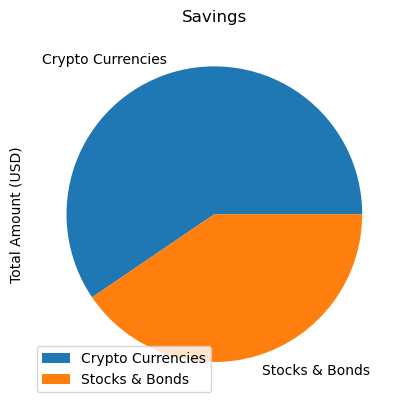

In [70]:
# Plot savings pie chart
savings_df.plot.pie(y="Total Amount (USD)", title="Savings")

In [81]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
fund_list = [total_savings_portfolio,emergency_fund]
# Calculate total amount of savings
total_savings_portfolio = total_crypto + stocks_bonds
total_savings_portfolio



104023.332

In [89]:
# Validate savings health

for number in fund_list:
    if fund_list[0] > fund_list[1]:
        print(f"Portfolio funds are sufficient for emergency funding")
    elif fund_list[0] < fund_list[1]:
        print(f"Portfolio funds insufficient")
    else:
        print(f"Congratulations: Portfolio funds suffice for emergency funding.")


Portfolio funds are sufficient for emergency funding
Portfolio funds are sufficient for emergency funding


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [113]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2018-12-04', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2023-12-04', tz='America/New_York').isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

In [114]:
alpaca_api_key = os.getenv("ALPACA_clé")
alpaca_secret = os.getenv("ALPACA_secrète")
# Create the Alpaca API object
alpaca_2 = tradeapi.REST(alpaca_api_key, alpaca_secret, api_version = "v2")

In [136]:
# Get 5 years' worth of historical data for SPY and AGG
# Format current date as ISO format

# Get current closing prices for SPY and AGG
crypto_portfolio_5_year = alpaca_2.get_bars(tickers,timeframe,start=start_date,end=end_date).df


# Concatenate the ticker DataFrames
crypto_concat_5_year = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Remove time stamps and Preview DataFrame
crypto_concat_5_year.index = crypto_concat_5_year.index.date
crypto_concat_5_year

# Reorganize the DataFrame
# Separate ticker data
AGG = crypto_portfolio_2[crypto_portfolio_2['symbol']=="AGG"].drop('symbol',axis=1)
SPY = crypto_portfolio_2[crypto_portfolio_2['symbol']=="SPY"].drop('symbol',axis=1)


# Concatenate the ticker DataFrames
ticker_concat_5_year = pd.concat([AGG,SPY],axis=1, keys=['AGG','SPY'])

# Display sample data
ticker_concat_5_year.head()

AGG                                        \
                            close      high     low trade_count    open   
timestamp                                                                 
2018-12-04 05:00:00+00:00  105.08  105.2799  104.94       14725  104.98   
2018-12-06 05:00:00+00:00  105.34  105.5400  105.28       19148  105.29   
2018-12-07 05:00:00+00:00  105.48  105.5500  105.28       15653  105.39   
2018-12-10 05:00:00+00:00  105.55  105.6300  105.43       16703  105.55   
2018-12-11 05:00:00+00:00  105.58  105.7166  105.51       20448  105.63   

                                                   SPY                    \
                            volume        vwap   close      high     low   
timestamp                                                                  
2018-12-04 05:00:00+00:00  5971915  105.085107  270.39  278.8500  269.90   
2018-12-06 05:00:00+00:00  7665752  105.374036  269.77  269.9700  262.44   
2018-12-07 05:00:00+00:00  5641771  105.448449  263.66  271.2200  262.63   
2018-12-10 05:00:00+00:00  6301706  105.521386  264.07  265.1613  258.62   
2018-12-11 05:00:00+00:00  8209671  105.624092  264.11  267.8700  262.48   

                                                                      
                          trade_count    open     volume        vwap  
timestamp                                                             
2018-12-04 05:00:00+00:00      864734  278.37  182203555  272.918990  
2018-12-06 05:00:00+00:00     1061720  265.92  207107459  266.618323  
2018-12-07 05:00:00+00:00      869798  269.46  163396256  265.648060  
2018-12-10 05:00:00+00:00      937170  263.37  153231653  262.218801  
2018-12-11 05:00:00+00:00      659380  267.66  123751607  265.214857

In [137]:
#Clear remaining time stamps
ticker_concat_5_year.index = ticker_concat_5_year.index.date
ticker_concat_5_year

AGG                                                    \
             close      high       low trade_count    open    volume   
2018-12-04  105.08  105.2799  104.9400       14725  104.98   5971915   
2018-12-06  105.34  105.5400  105.2800       19148  105.29   7665752   
2018-12-07  105.48  105.5500  105.2800       15653  105.39   5641771   
2018-12-10  105.55  105.6300  105.4300       16703  105.55   6301706   
2018-12-11  105.58  105.7166  105.5100       20448  105.63   8209671   
...            ...       ...       ...         ...     ...       ...   
2023-11-28   96.11   96.1300   95.5650       33439   95.61   9749395   
2023-11-29   96.58   96.6650   96.3414       33859   96.42   8006828   
2023-11-30   96.26   96.4100   96.1300       28381   96.38   8889239   
2023-12-01   96.83   96.8690   95.9700       50487   96.00  11774312   
2023-12-04   96.46   96.6678   96.3135       34615   96.58   9436089   

                           SPY                                        \
                  vwap   close      high     low trade_count    open   
2018-12-04  105.085107  270.39  278.8500  269.90      864734  278.37   
2018-12-06  105.374036  269.77  269.9700  262.44     1061720  265.92   
2018-12-07  105.448449  263.66  271.2200  262.63      869798  269.46   
2018-12-10  105.521386  264.07  265.1613  258.62      937170  263.37   
2018-12-11  105.624092  264.11  267.8700  262.48      659380  267.66   
...                ...     ...       ...     ...         ...     ...   
2023-11-28   95.944402  454.93  456.2700  453.50      461132  454.08   
2023-11-29   96.526365  454.61  458.3200  454.20      455449  457.15   
2023-11-30   96.276128  456.40  456.7600  453.34      516019  455.48   
2023-12-01   96.494629  459.10  459.6500  455.16      605281  455.77   
2023-12-04   96.447272  456.69  459.1206  454.34      537941  455.60   

                                   
               volume        vwap  
2018-12-04  182203555  272.918990  
2018-12-06  207107459  266.618323  
2018-12-07  163396256  265.648060  
2018-12-10  153231653  262.218801  
2018-12-11  123751607  265.214857  
...               ...         ...  
2023-11-28   62115013  454.721790  
2023-11-29   63145994  455.817869  
2023-11-30   79752702  455.145660  
2023-12-01   89147486  457.871367  
2023-12-04   71797729  456.187823  

[1258 rows x 14 columns]

In [154]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30_year = MCSimulation(
    portfolio_data = ticker_concat_5_year, 
    weights=[.60,.40],
    num_simulation = 500,
    num_trading_days = 252*30
)


In [155]:
# Printing the simulation input data
MC_30_year.portfolio_data.head()

AGG                                                             \
             close      high     low trade_count    open   volume        vwap   
2018-12-04  105.08  105.2799  104.94       14725  104.98  5971915  105.085107   
2018-12-06  105.34  105.5400  105.28       19148  105.29  7665752  105.374036   
2018-12-07  105.48  105.5500  105.28       15653  105.39  5641771  105.448449   
2018-12-10  105.55  105.6300  105.43       16703  105.55  6301706  105.521386   
2018-12-11  105.58  105.7166  105.51       20448  105.63  8209671  105.624092   

                            SPY                                        \
           daily_return   close      high     low trade_count    open   
2018-12-04          NaN  270.39  278.8500  269.90      864734  278.37   
2018-12-06     0.002474  269.77  269.9700  262.44     1061720  265.92   
2018-12-07     0.001329  263.66  271.2200  262.63      869798  269.46   
2018-12-10     0.000664  264.07  265.1613  258.62      937170  263.37   
2018-12-11     0.000284  264.11  267.8700  262.48      659380  267.66   

                                                
               volume        vwap daily_return  
2018-12-04  182203555  272.918990          NaN  
2018-12-06  207107459  266.618323    -0.002293  
2018-12-07  163396256  265.648060    -0.022649  
2018-12-10  153231653  262.218801     0.001555  
2018-12-11  123751607  265.214857     0.000151

In [170]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30_year_data_ = MC_30_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/khareemhenderson/Desktop/FinTech/Challenges/Challenge_module_5/Instructions(original)/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/khareemhenderson/Desktop/FinTech/Challenges/Challenge_module_5/Instructions(original)/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/khareemhenderson/Desktop/FinTech/Challeng

Running Monte Carlo simulation number 110.


/Users/khareemhenderson/Desktop/FinTech/Challenges/Challenge_module_5/Instructions(original)/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/khareemhenderson/Desktop/FinTech/Challenges/Challenge_module_5/Instructions(original)/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/khareemhenderson/Desktop/FinTech/Challeng

Running Monte Carlo simulation number 120.


/Users/khareemhenderson/Desktop/FinTech/Challenges/Challenge_module_5/Instructions(original)/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/khareemhenderson/Desktop/FinTech/Challenges/Challenge_module_5/Instructions(original)/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/khareemhenderson/Desktop/FinTech/Challeng

Running Monte Carlo simulation number 130.


/Users/khareemhenderson/Desktop/FinTech/Challenges/Challenge_module_5/Instructions(original)/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/khareemhenderson/Desktop/FinTech/Challenges/Challenge_module_5/Instructions(original)/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/khareemhenderson/Desktop/FinTech/Challeng

Running Monte Carlo simulation number 140.


/Users/khareemhenderson/Desktop/FinTech/Challenges/Challenge_module_5/Instructions(original)/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/khareemhenderson/Desktop/FinTech/Challenges/Challenge_module_5/Instructions(original)/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/khareemhenderson/Desktop/FinTech/Challeng

Running Monte Carlo simulation number 150.


/Users/khareemhenderson/Desktop/FinTech/Challenges/Challenge_module_5/Instructions(original)/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/khareemhenderson/Desktop/FinTech/Challenges/Challenge_module_5/Instructions(original)/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/khareemhenderson/Desktop/FinTech/Challeng

Running Monte Carlo simulation number 160.


/Users/khareemhenderson/Desktop/FinTech/Challenges/Challenge_module_5/Instructions(original)/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/khareemhenderson/Desktop/FinTech/Challenges/Challenge_module_5/Instructions(original)/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/khareemhenderson/Desktop/FinTech/Challeng

Running Monte Carlo simulation number 170.


/Users/khareemhenderson/Desktop/FinTech/Challenges/Challenge_module_5/Instructions(original)/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/khareemhenderson/Desktop/FinTech/Challenges/Challenge_module_5/Instructions(original)/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/khareemhenderson/Desktop/FinTech/Challeng

Running Monte Carlo simulation number 180.


/Users/khareemhenderson/Desktop/FinTech/Challenges/Challenge_module_5/Instructions(original)/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/khareemhenderson/Desktop/FinTech/Challenges/Challenge_module_5/Instructions(original)/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/khareemhenderson/Desktop/FinTech/Challeng

Running Monte Carlo simulation number 190.


/Users/khareemhenderson/Desktop/FinTech/Challenges/Challenge_module_5/Instructions(original)/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/khareemhenderson/Desktop/FinTech/Challenges/Challenge_module_5/Instructions(original)/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/khareemhenderson/Desktop/FinTech/Challeng

Running Monte Carlo simulation number 200.


/Users/khareemhenderson/Desktop/FinTech/Challenges/Challenge_module_5/Instructions(original)/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/khareemhenderson/Desktop/FinTech/Challenges/Challenge_module_5/Instructions(original)/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/khareemhenderson/Desktop/FinTech/Challeng

Running Monte Carlo simulation number 210.


/Users/khareemhenderson/Desktop/FinTech/Challenges/Challenge_module_5/Instructions(original)/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/khareemhenderson/Desktop/FinTech/Challenges/Challenge_module_5/Instructions(original)/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/khareemhenderson/Desktop/FinTech/Challeng

Running Monte Carlo simulation number 220.


/Users/khareemhenderson/Desktop/FinTech/Challenges/Challenge_module_5/Instructions(original)/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/khareemhenderson/Desktop/FinTech/Challenges/Challenge_module_5/Instructions(original)/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/khareemhenderson/Desktop/FinTech/Challeng

Running Monte Carlo simulation number 230.


/Users/khareemhenderson/Desktop/FinTech/Challenges/Challenge_module_5/Instructions(original)/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/khareemhenderson/Desktop/FinTech/Challenges/Challenge_module_5/Instructions(original)/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/khareemhenderson/Desktop/FinTech/Challeng

Running Monte Carlo simulation number 240.


/Users/khareemhenderson/Desktop/FinTech/Challenges/Challenge_module_5/Instructions(original)/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/khareemhenderson/Desktop/FinTech/Challenges/Challenge_module_5/Instructions(original)/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/khareemhenderson/Desktop/FinTech/Challeng

Running Monte Carlo simulation number 250.


/Users/khareemhenderson/Desktop/FinTech/Challenges/Challenge_module_5/Instructions(original)/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/khareemhenderson/Desktop/FinTech/Challenges/Challenge_module_5/Instructions(original)/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/khareemhenderson/Desktop/FinTech/Challeng

Running Monte Carlo simulation number 260.


/Users/khareemhenderson/Desktop/FinTech/Challenges/Challenge_module_5/Instructions(original)/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/khareemhenderson/Desktop/FinTech/Challenges/Challenge_module_5/Instructions(original)/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/khareemhenderson/Desktop/FinTech/Challeng

Running Monte Carlo simulation number 270.


/Users/khareemhenderson/Desktop/FinTech/Challenges/Challenge_module_5/Instructions(original)/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/khareemhenderson/Desktop/FinTech/Challenges/Challenge_module_5/Instructions(original)/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/khareemhenderson/Desktop/FinTech/Challeng

Running Monte Carlo simulation number 280.


/Users/khareemhenderson/Desktop/FinTech/Challenges/Challenge_module_5/Instructions(original)/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/khareemhenderson/Desktop/FinTech/Challenges/Challenge_module_5/Instructions(original)/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/khareemhenderson/Desktop/FinTech/Challeng

Running Monte Carlo simulation number 290.


/Users/khareemhenderson/Desktop/FinTech/Challenges/Challenge_module_5/Instructions(original)/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/khareemhenderson/Desktop/FinTech/Challenges/Challenge_module_5/Instructions(original)/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/khareemhenderson/Desktop/FinTech/Challeng

Running Monte Carlo simulation number 300.


/Users/khareemhenderson/Desktop/FinTech/Challenges/Challenge_module_5/Instructions(original)/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/khareemhenderson/Desktop/FinTech/Challenges/Challenge_module_5/Instructions(original)/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/khareemhenderson/Desktop/FinTech/Challeng

Running Monte Carlo simulation number 310.


/Users/khareemhenderson/Desktop/FinTech/Challenges/Challenge_module_5/Instructions(original)/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/khareemhenderson/Desktop/FinTech/Challenges/Challenge_module_5/Instructions(original)/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/khareemhenderson/Desktop/FinTech/Challeng

Running Monte Carlo simulation number 320.


/Users/khareemhenderson/Desktop/FinTech/Challenges/Challenge_module_5/Instructions(original)/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/khareemhenderson/Desktop/FinTech/Challenges/Challenge_module_5/Instructions(original)/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/khareemhenderson/Desktop/FinTech/Challeng

Running Monte Carlo simulation number 330.


/Users/khareemhenderson/Desktop/FinTech/Challenges/Challenge_module_5/Instructions(original)/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/khareemhenderson/Desktop/FinTech/Challenges/Challenge_module_5/Instructions(original)/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/khareemhenderson/Desktop/FinTech/Challeng

Running Monte Carlo simulation number 340.


/Users/khareemhenderson/Desktop/FinTech/Challenges/Challenge_module_5/Instructions(original)/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/khareemhenderson/Desktop/FinTech/Challenges/Challenge_module_5/Instructions(original)/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/khareemhenderson/Desktop/FinTech/Challeng

Running Monte Carlo simulation number 350.


/Users/khareemhenderson/Desktop/FinTech/Challenges/Challenge_module_5/Instructions(original)/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/khareemhenderson/Desktop/FinTech/Challenges/Challenge_module_5/Instructions(original)/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/khareemhenderson/Desktop/FinTech/Challeng

Running Monte Carlo simulation number 360.


/Users/khareemhenderson/Desktop/FinTech/Challenges/Challenge_module_5/Instructions(original)/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/khareemhenderson/Desktop/FinTech/Challenges/Challenge_module_5/Instructions(original)/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/khareemhenderson/Desktop/FinTech/Challeng

Running Monte Carlo simulation number 370.


/Users/khareemhenderson/Desktop/FinTech/Challenges/Challenge_module_5/Instructions(original)/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/khareemhenderson/Desktop/FinTech/Challenges/Challenge_module_5/Instructions(original)/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/khareemhenderson/Desktop/FinTech/Challeng

Running Monte Carlo simulation number 380.


/Users/khareemhenderson/Desktop/FinTech/Challenges/Challenge_module_5/Instructions(original)/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/khareemhenderson/Desktop/FinTech/Challenges/Challenge_module_5/Instructions(original)/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/khareemhenderson/Desktop/FinTech/Challeng

Running Monte Carlo simulation number 390.


/Users/khareemhenderson/Desktop/FinTech/Challenges/Challenge_module_5/Instructions(original)/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/khareemhenderson/Desktop/FinTech/Challenges/Challenge_module_5/Instructions(original)/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/khareemhenderson/Desktop/FinTech/Challeng

Running Monte Carlo simulation number 400.


/Users/khareemhenderson/Desktop/FinTech/Challenges/Challenge_module_5/Instructions(original)/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/khareemhenderson/Desktop/FinTech/Challenges/Challenge_module_5/Instructions(original)/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/khareemhenderson/Desktop/FinTech/Challeng

Running Monte Carlo simulation number 410.


/Users/khareemhenderson/Desktop/FinTech/Challenges/Challenge_module_5/Instructions(original)/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/khareemhenderson/Desktop/FinTech/Challenges/Challenge_module_5/Instructions(original)/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/khareemhenderson/Desktop/FinTech/Challeng

Running Monte Carlo simulation number 420.


/Users/khareemhenderson/Desktop/FinTech/Challenges/Challenge_module_5/Instructions(original)/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/khareemhenderson/Desktop/FinTech/Challenges/Challenge_module_5/Instructions(original)/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/khareemhenderson/Desktop/FinTech/Challeng

Running Monte Carlo simulation number 430.


/Users/khareemhenderson/Desktop/FinTech/Challenges/Challenge_module_5/Instructions(original)/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/khareemhenderson/Desktop/FinTech/Challenges/Challenge_module_5/Instructions(original)/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/khareemhenderson/Desktop/FinTech/Challeng

Running Monte Carlo simulation number 440.


/Users/khareemhenderson/Desktop/FinTech/Challenges/Challenge_module_5/Instructions(original)/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/khareemhenderson/Desktop/FinTech/Challenges/Challenge_module_5/Instructions(original)/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/khareemhenderson/Desktop/FinTech/Challeng

Running Monte Carlo simulation number 450.


/Users/khareemhenderson/Desktop/FinTech/Challenges/Challenge_module_5/Instructions(original)/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/khareemhenderson/Desktop/FinTech/Challenges/Challenge_module_5/Instructions(original)/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/khareemhenderson/Desktop/FinTech/Challeng

Running Monte Carlo simulation number 460.


/Users/khareemhenderson/Desktop/FinTech/Challenges/Challenge_module_5/Instructions(original)/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/khareemhenderson/Desktop/FinTech/Challenges/Challenge_module_5/Instructions(original)/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/khareemhenderson/Desktop/FinTech/Challeng

Running Monte Carlo simulation number 470.


/Users/khareemhenderson/Desktop/FinTech/Challenges/Challenge_module_5/Instructions(original)/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/khareemhenderson/Desktop/FinTech/Challenges/Challenge_module_5/Instructions(original)/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/khareemhenderson/Desktop/FinTech/Challeng

Running Monte Carlo simulation number 480.


/Users/khareemhenderson/Desktop/FinTech/Challenges/Challenge_module_5/Instructions(original)/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/khareemhenderson/Desktop/FinTech/Challenges/Challenge_module_5/Instructions(original)/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/khareemhenderson/Desktop/FinTech/Challeng

Running Monte Carlo simulation number 490.


/Users/khareemhenderson/Desktop/FinTech/Challenges/Challenge_module_5/Instructions(original)/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/khareemhenderson/Desktop/FinTech/Challenges/Challenge_module_5/Instructions(original)/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/khareemhenderson/Desktop/FinTech/Challeng

<Axes: title={'center': '500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

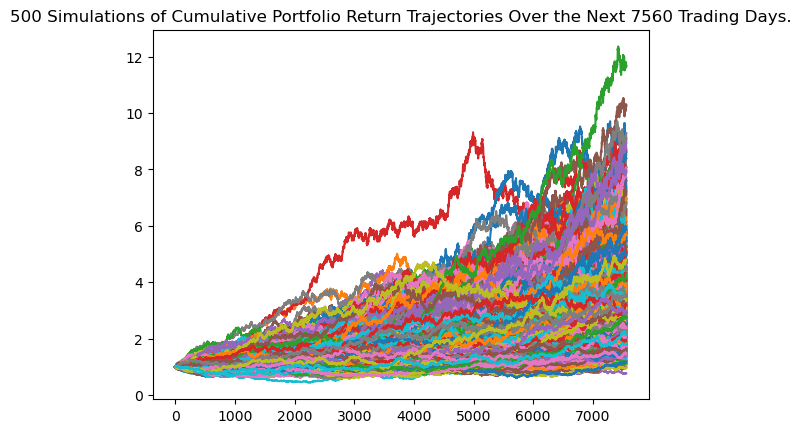

In [157]:
# Plot simulation outcomes
MC_30_plot = MC_30_year.plot_simulation()
MC_30_plot

<Axes: title={'center': 'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

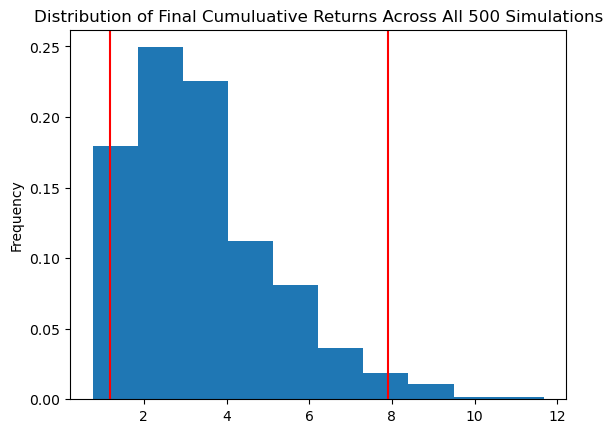

In [159]:
# Plot probability distribution and confidence intervals
dist_plot = MC_30_year.plot_distribution()
dist_plot

### Retirement Analysis

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_30_year_dstats = MC_30_year.summarize_cumulative_return()
print(MC_30_year_dstats)

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(MC_30_year_dstats[8]*20000,2)
ci_upper = round(MC_30_year_dstats[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(MC_30_year_dstats[8]*30000,2)
ci_upper = round(MC_30_year_dstats[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")